In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Equal or more than 15 hurricans in a year: 0.0008444930803583883

Z-score: 3.4661629670697414
p-value: 0.00026397158691493505

H0 must be rejected: we cannot accpet that in a year the number of hurricans is 15


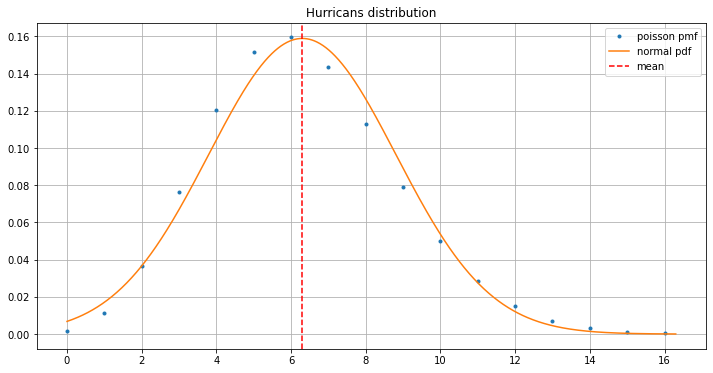

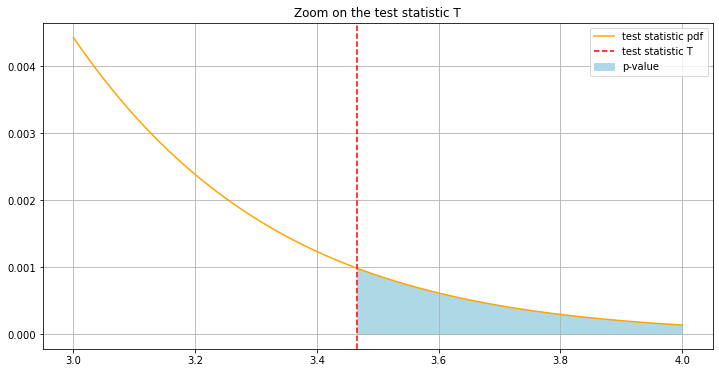

In [3]:
# number of hurricans is Poisson
mu = sigma = 6.3

# measurement inf 2005
x0 = 15

# poisson distribution
k = np.arange(0, mu+10) # it basically computes only integer points!!!
hurr = stats.poisson.pmf(k, mu)

# gaussian approximation
x = np.linspace(0, mu+10, 1000)
hurr_norm = stats.norm.pdf(x, mu, np.sqrt(mu))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(k, hurr, label='poisson pmf', marker='.', linestyle='none')
ax.plot(x, hurr_norm, label='normal pdf')
ax.axvline(mu, color='red',linestyle='--', label= 'mean')
ax.set_title('Hurricans distribution')
ax.legend()
ax.grid()

# compute the probability that the number of hurracains is larger of equal than 15
# assume the number of hurricanes is random, i.e. follows the Poisson distribution
k1 = np.arange(15,20)
prob = 1 - stats.poisson.cdf(15, mu)
print('Equal or more than 15 hurricans in a year:', prob)

# assume as statistically significant a probability that has a Z score of 2 or larger 
# with respect a normal distribution, or equivalently a level of significance of 0.022
alpha = 0.022 # level of significance 
T = abs(x0 - mu) / np.sqrt(mu)
print('\nZ-score:', T)

# test statistic
xs = np.linspace(3, 4, 1000)
ts = stats.norm.pdf(xs)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(xs, ts, color='orange', label='test statistic pdf')
ax1.axvline(T, color='red', linestyle='--', label='test statistic T')
ax1.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue', label='p-value')
ax1.set_title('Zoom on the test statistic T')
ax1.legend()
ax1.set
ax1.grid()

# p-value
pvalue = 1 - stats.norm.cdf(T)
print('p-value:', pvalue)
if(pvalue < alpha):
    print('\nH0 must be rejected: we cannot accpet that in a year the number of hurricans is 15')
else:
    print('\nH0 is accepted: we can accpet that in a year the number of hurricans is 15')

plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T-score: -3.786997938137629

p-value: 0.004302464132864604

Of course, the maximum significance level at which we can
accept the null hypothesis correspond to the p-value.


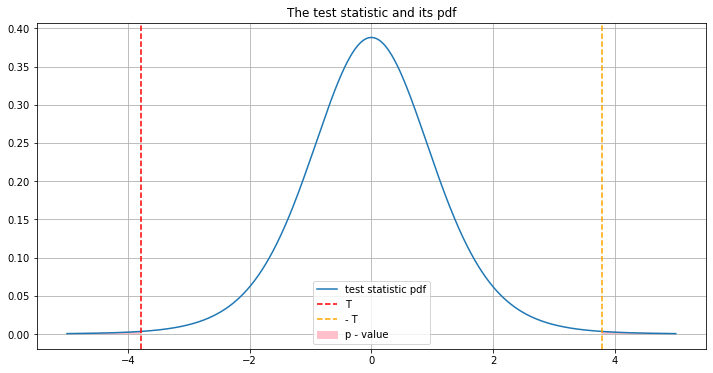

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = 10

# the Student's  𝑡 -test should be performed to compare the two datasets
x1 = np.mean(pre) # mean of pre
x2 = np.mean(post) # mean of post
var1 = np.var(pre, ddof=1) # variance of pre
var2 = np.var(post, ddof=1) # variance of post

sigma = np.sqrt((var1 + var2) / 2)
T = (x1 - x2) / (sigma * np.sqrt(2 / n))
print('T-score:', T)

# plot the test statistic and its pdf
xs = np.linspace(-5, 5, 1000)
ts = stats.t.pdf(xs, n-1)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(xs, ts, label='test statistic pdf')
ax.axvline(T, color='red', label='T', linestyle='--')
ax.axvline(-T, color='orange', label='- T', linestyle='--')
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='pink', label='p - value')
ax.set_title('The test statistic and its pdf')
ax.legend()
ax.grid()

# p-value
pvalue = (stats.t.cdf(T, n-1)) + (1 - stats.t.cdf(-T, n-1))
print('\np-value:', pvalue)

# result
print('\nOf course, the maximum significance level at which we can') 
print('accept the null hypothesis correspond to the p-value.')

plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The optimal parameters for maxs are:
	a: 10.582 +- 0.168
	b: 0.592 +- 0.0
	c: 3.872 +- 0.021
	d: 27.95 +- 0.183

The optimal parameters for mins are:
	a: 25.15 +- 1.728
	b: 0.601 +- 0.001
	c: 3.565 +- 0.027
	d: -36.713 +- 1.419

We have obtained resonable fits.
We can notice that the two periodic function have similar values of b and c (amplitude
and time offset), but quite different values of a and d (amplitude and offset).


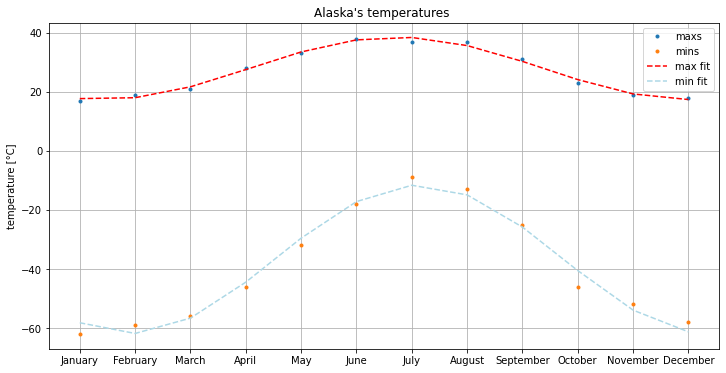

In [5]:
maxs = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mins = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
xs = np.linspace(1, 12, 12)
months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# plot hte temperatures
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(months, maxs, label='maxs', linestyle='None', marker='.')
ax.plot(months, mins, label='mins', linestyle='None', marker='.')
ax.set_ylabel('temperature [°C]')
ax.set_title('Alaska\'s temperatures ')
ax.grid()

# find a suitable a function that can describe min and max temperatures
def f(x, a, b, c, d):
    return a * np.sin(b*x + c) + d 

# fit maxs
popt1, pcov1 = optimize.curve_fit(f, xs, maxs, p0=(10,1,1,1), full_output=False)
print('The optimal parameters for maxs are:')
print('\ta:', np.round(popt1[0], 3), '+-', np.round(pcov1[0,0], 3))
print('\tb:', np.round(popt1[1], 3), '+-', np.round(pcov1[1,1], 3))
print('\tc:', np.round(popt1[2], 3), '+-', np.round(pcov1[2,2], 3))
print('\td:', np.round(popt1[3], 3), '+-', np.round(pcov1[3,3], 3))

f_max = f(xs, popt1[0], popt1[1], popt1[2], popt1[3])
ax.plot(months, f_max, linestyle='--', color='red', label='max fit')

# fit mins
popt2, pcov2 = optimize.curve_fit(f, xs, mins, p0=(30,1,1,1), full_output=False)
print('\nThe optimal parameters for mins are:')
print('\ta:', np.round(popt2[0], 3), '+-', np.round(pcov2[0,0], 3))
print('\tb:', np.round(popt2[1], 3), '+-', np.round(pcov2[1,1], 3))
print('\tc:', np.round(popt2[2], 3), '+-', np.round(pcov2[2,2], 3))
print('\td:', np.round(popt2[3], 3), '+-', np.round(pcov2[3,3], 3))

f_min = f(xs, popt2[0], popt2[1], popt2[2], popt2[3])
ax.plot(months, f_min, linestyle='--', color='lightblue', label='min fit')


# comment
print('\nWe have obtained resonable fits.')
print('We can notice that the two periodic function have similar values of b and c (amplitude')
print('and time offset), but quite different values of a and d (amplitude and offset).')


ax.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [38]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-12-23 09:38:28--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-23 09:38:29--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73e81bbb3824010ae37e36d3a6.dl.dropboxusercontent.com/cd/0/inline/CJ8_sljaMH1xGqgSr-xk9PCdu75lYqSkvMvJXCxqXdbSog33JZl0_i7vKdRZP15dMPhUIHHegqlxj3Ip1Tw9Y7OXtlCA1Q56kieLhY7M_gORAhJJKfZo1emM7w2wfy5pbDE/file# [following]
--2023-12-23 09:38:29--  https://uc73e81bbb3824010ae37e36d3a6.dl.dropboxusercontent.com/cd/0/inline/CJ8_sljaMH1xGqgSr-xk9PCdu75lYqSkvMvJXCxqXdbSog33JZl0_i7vKdRZP15dMPhUIHHegqlxj3Ip1Tw9Y7OXtlCA1Q56kieLhY7M_gORAhJJKfZo1emM7w2wfy5pbDE/file
Resolving uc73e81bbb3824010ae37e3

In [39]:
file = 'data/residuals_261.pkl'
df = pd.DataFrame(np.load(file,allow_pickle=True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Fit parameters:

a = 1477.023 +- 36.287
mu = -0.084 +- 0.006
sigma = 0.223 +- 0.006


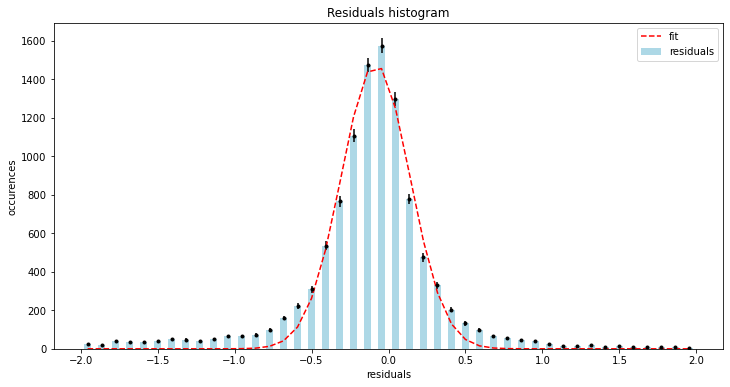

In [40]:
residuals = df['residuals']
binNumber = int(2*(len(residuals)**(1/3)))

# histogram
fig, ax = plt.subplots(1, 1, figsize=(12 ,6))
n, bins, value = ax.hist(residuals, bins=binNumber, range=[-2, 2], color='lightblue', rwidth=0.5)
ax.set_xlabel('residuals')
ax.set_ylabel('occurences')
ax.set_title('Residuals histogram')

# uncertainty
sigma = np.sqrt(n)
x_data = [(bins[i]+bins[i+1])/2 for i in range(len(bins) - 1)]
ax.errorbar(x_data, n, yerr=sigma, fmt='.k')

# fitting function
def gaussian_f(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

# fit
popt, pcov = optimize.curve_fit(gaussian_f, x_data, n, p0=[550, -0.2, 1], full_output=False)
ax.plot(x_data, gaussian_f(x_data, popt[0], popt[1], popt[2]), linestyle='--', color='red')
ax.legend(['fit', 'residuals'])
print("Fit parameters:\n")
print("a = %.3f +- %.3f" %(popt[0], np.sqrt(pcov[0,0])))
print("mu = %.3f +- %.3f" %(popt[1], np.sqrt(pcov[1,1])))
print("sigma = %.3f +- %.3f" %(popt[2], np.sqrt(pcov[2,2])))

plt.show()

In [44]:
# chi2 goodness-of-fit test
f = gaussian_f(x_data, popt[0], popt[1], popt[2])
ndof = len(x_data) - 1
chi2 = np.sum(((n - f)**2) / n**2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)

print('chi2 =', chi2)
print('\np-value =', pvalue)
print('\nThe p-value is close to 1, so we can say that the fit is satisfactory.')

chi2 = 30.637741244140106

p-value = 0.921300746185738

The p-value is close to 1, so we can say that the fit is satisfactory.


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [57]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-12-23 10:28:37--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-12-23 10:28:38--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc266ca4c879c6e0865be5754a3e.dl.dropboxusercontent.com/cd/0/inline/CJ-hcCDhfcEYIMroi65aNo0kFloqTK7mP3WH-1JtWO8baZ0MeKW2gKovwsH7zW9r-iH5G0xoyl9PS-1UUcND5cZJ5Tz5s8pXOntY8r8L_YIWgHeiMBfJq5dvi9KIaZ7GwzU/file# [following]
--2023-12-23 10:28:38--  https://uc266ca4c879c6e0865be5754a3e.dl.dropboxusercontent.com/cd/0/inline/CJ-hcCDhfcEYIMroi65aNo0kFloqTK7mP3WH-1JtWO8baZ0MeKW2gKovwsH7zW9r-iH5G0xoyl9PS-1UUcND5c

Fit parameters:
	a = -9.986 +- 0.180
	b = 12.335 +- 0.018
	c = 9.391 +- 0.127

Overall average temperature: 9.384097733019743 °C
Coldest temperature: -0.5952594395072879 °C
Hottest temperature: 19.3770766591819 °C

The 'b' parameter tells us how the cosine function oscillates over the time, so
it basically describes the periodic behaviour of the temperatures during the years.


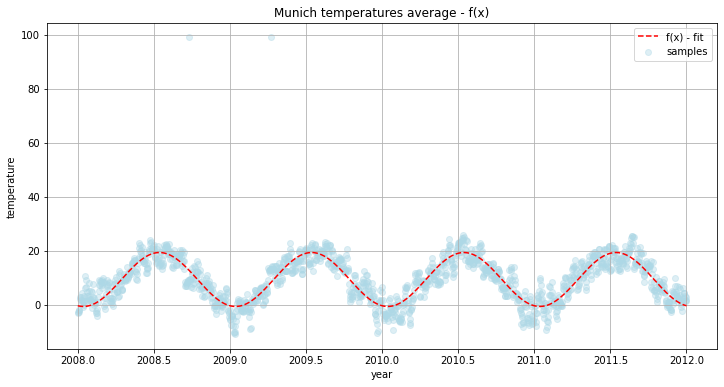

OPTIONAL: g(x)

Fit parameters:
	a = -9.983 +- 0.181
	b = 1.001 +- 0.003
	c = 3.908 +- 32.155
	d = 9.397 +- 0.129

Overall average temperature: 9.384097772215489 °C
Coldest temperature: -0.5862230025972828 °C
Hottest temperature: 19.380656699209915 °C

RSS of f(x): 34343.394833304046
RSS of g(x): 34341.88589495346

p-value of fisher F-test: 0.800221984178402
This tells us that the additional parameters is not so useful of our case.


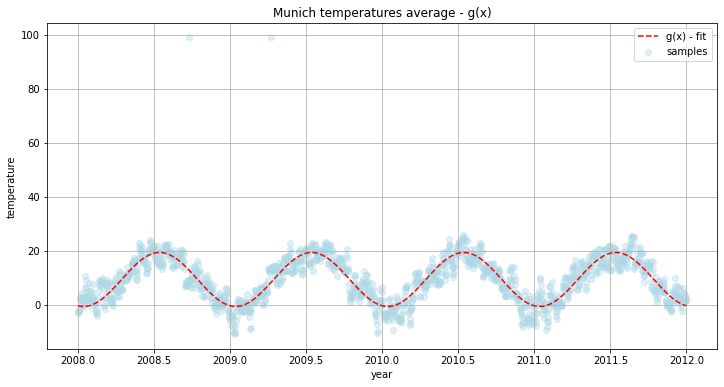

In [151]:
file = 'munich_temperatures_average_with_bad_data.txt'
df = pd.read_table(open(file), sep=' ', names=['days', 'temp'])
df = df[(df['days']>2008) & (df['days']<2012)]
temp = df['temp']
t = df['days']

# plots
fig, ax = plt.subplots(1, 1, figsize=[12,6])
t = np.linspace(2008, 2012, len(temp))
ax.scatter(t, temp, alpha=0.4, color='lightblue')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('Munich temperatures average - f(x)')

# fitting function f(x)
def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

# fit
popt, pcov = optimize.curve_fit(f, t, temp, full_output=False)
print('Fit parameters:')
print('\ta = %.3f +- %.3f' %(popt[0], np.sqrt(pcov[0,0])))
print('\tb = %.3f +- %.3f' %(popt[1], np.sqrt(pcov[1,1])))
print('\tc = %.3f +- %.3f' %(popt[2], np.sqrt(pcov[2,2])))
ax.plot(t, f(t, popt[0], popt[1], popt[2]), linestyle='--', color='red')
ax.legend(['f(x) - fit', 'samples'])
ax.grid()

#results
fit1 = f(t, popt[0], popt[1], popt[2])
print('\nOverall average temperature:', np.mean(fit1), '°C')
print('Coldest temperature:', np.min(fit1), '°C')
print('Hottest temperature:', np.max(fit1), '°C')
print('\nThe \'b\' parameter tells us how the cosine function oscillates over the time, so')
print('it basically describes the periodic behaviour of the temperatures during the years.')

plt.show()


### OPTIONAL ###


# plots
fig, ax = plt.subplots(1, 1, figsize=[12,6])
t = np.linspace(2008, 2012, len(temp))
ax.scatter(t, temp, alpha=0.4, color='lightblue')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('Munich temperatures average - g(x)')

# fitting function g(x)
def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

# fit
popt, pcov = optimize.curve_fit(g, t, temp, full_output=False)
print('OPTIONAL: g(x)\n')
print('Fit parameters:')
print('\ta = %.3f +- %.3f' %(popt[0], np.sqrt(pcov[0,0])))
print('\tb = %.3f +- %.3f' %(popt[1], np.sqrt(pcov[1,1])))
print('\tc = %.3f +- %.3f' %(popt[2], np.sqrt(pcov[2,2])))
print('\td = %.3f +- %.3f' %(popt[3], np.sqrt(pcov[3,3])))
ax.plot(t, g(t, popt[0], popt[1], popt[2], popt[3]), linestyle='--', color='red')
ax.legend(['g(x) - fit', 'samples'])
ax.grid()

#results
fit2 = g(t, popt[0], popt[1], popt[2], popt[3])
print('\nOverall average temperature:', np.mean(fit2), '°C')
print('Coldest temperature:', np.min(fit2), '°C')
print('Hottest temperature:', np.max(fit2), '°C')

# F-test function
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N):
    F = ((ssr_1 - ssr_2) / (ndof_2 - ndof_1)) / (ssr_2 / (N - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, N -ndof_2)
    return pval

# RSS
rss_f = np.sum((fit1 - temp)**2)
rss_g = np.sum((fit2 - temp)**2)
ndof_f = 3 - 1 # number of parameters - 1
ndof_g = 4 - 1 # number of parameters - 1
pval = Ftest(rss_f, rss_g, ndof_f, ndof_g, len(temp))
print('\nRSS of f(x):', rss_f)
print('RSS of g(x):', rss_g)
print('\np-value of fisher F-test:', pval)
print('This tells us that the additional parameters is not so useful of our case.')

plt.show()